"""
In this problem you are going to construct ROC curves for signal detection thoery.
    For purposes of this problem, we will be concerned with equal variance SDT.
    
- Assume the noise distribution is the standard normal: N(0.0,1.0)
- The signal distribution is then N(d',1.0) where we will be varying d' as discussed below.
- The criterion is some value c>0.

We know that by reducing the value of 'c', we can achieve more hits but at the expense of more false alarms. This is a tradeoff. When the task is easy (large d'), this  tradeoff should be minimal. When the task is difficult (smaller d'), this tradeoff will be more acute. This can easily be seen by drawing the signal and noise Distributions and varying the location of the criterion.

Here we are going to quantify this tradeoff as a function of d' by plotting ROC curves 
    for varying values of d'.

    - Fix a value of d'.
    - For this, consider criterion values c = 0.0-->10.0.
    - For a range of values in this interval, calculate the hit and false alarm rate.
        You will now have two vectors, H and FA associated with this single value of d'.
    - For this value of d', plot H (y-axis) vs FA (x-axis).
    - Do this for values of d' = 0, 1, 2 ,3 ,4. This will produce a SINGLE plots
        with five curves on it. (d' equals to mean difference between signal and noise distributions)
    - The result of this question is the plot itself.
    - Note that there is more than one reasonable way to approach this question. 
        Any correct approach is acceptable.
    - Also note that this figure is in the notes (you know what you should end up with).


"""

In [2]:
using Pkg
Pkg.instantiate()
Pkg.status()

Status `~/.julia/environments/v1.10/Project.toml`
  [31c24e10] Distributions v0.25.107
  [033835bb] JLD2 v0.4.45
  [f0f68f2c] PlotlyJS v0.18.12
  [91a5bcdd] Plots v1.40.0
  [f3b207a7] StatsPlots v0.15.6


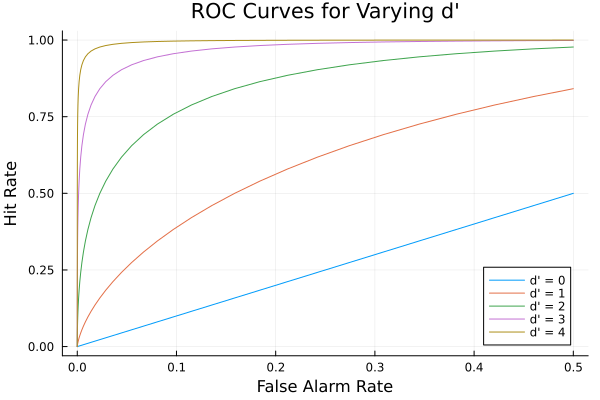

In [73]:
using Distributions
using Plots

# Calculate the hit and false alarm rates
function calculate_rates(d_prime, criterion_range)
    signal_dist = Normal(d_prime, 1.0)
    noise_dist = Normal(0.0, 1.0)
    
    hit_rates = []
    false_alarm_rates = []
    
    for c in criterion_range
        hit_rate = 1.0 - cdf(signal_dist, c) # cdf is the cumulative distribution function
        false_alarm_rate = 1.0 - cdf(noise_dist, c)
        
        push!(hit_rates, hit_rate) # push! is for adding an element to an array
        push!(false_alarm_rates, false_alarm_rate)
    end
    
    return hit_rates, false_alarm_rates
end

# Main plotting function
function plot_roc_curves()
    d_primes = 0:4
    criterion_range = 0.0:0.1:10.0 #from 0 to 10 with a step of 0.1
    plot()
    
    for d_prime in d_primes
        hit_rates, false_alarm_rates = calculate_rates(d_prime, criterion_range)
        plot!(false_alarm_rates, hit_rates, label="d' = $d_prime")
    end
    
    xlabel!("False Alarm Rate")
    ylabel!("Hit Rate")
    title!("ROC Curves for Varying d'")
    
end

# Generate and display the ROC curves
plot_roc_curves()
